# Critical Scale Invariance in a Healthy Human Heart Rate
<hr>

> Tommaso Bertola, Giacomo Di Prima, Giuseppe Viterbo, Marco Zenari

## Abstract
In this notebook we will reproduce the analysis made by Kiyono in this Physical Review Letter [Kiyono, 1](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.93.178103). We will investigate the probability distribution function of heart beat time intervals recorded from healty individuals. A model inspired by high Reynolds number turbolence effects on fluid velocities, taken from Castaing's work, will be used to fit the data and test the scale invariance of the distribution of interbeats times. Rhythms from unhealty individuals will be also taken into account to test whether they follow the same distibutions and trends, thus providing hints to pathological or life threathening diagnosis conditions.

# Healthy Heart Rate Variability and its Probability Distribution
Human heart rate is a complex biological signal, whose statistical properties are deeply studied not only from a medical point of view. i.e. to assess the patient's medical conditions, but also from a mathematical perspective.

Here we will mainly focus our attention to the probability distribution of the cardiac interbeat times, defined as the time differences between consecutives heart contractions. Such PDF does not follow a Gaussian statistic [Peng, 2](https://link.aps.org/doi/10.1103/PhysRevLett.70.1343) and more importantly displays a robust scale invariance, hence suggesting the idea that a healthy cardiac system operates near a critical and out of equilibrium state [Yvanov, 3](https://www.nature.com/articles/20924).

To further investigate these hypotheses, unhealthy rythms will also be analyzed. Some studies suggest the presence of deviations from the healthy PDF could be used as a possible tool for cardiac health check [Bigger, 4](https://www.ahajournals.org/doi/10.1161/01.CIR.93.12.2142), as discrepancies from a healthy critical behaviour may reduce the overall efficiency of transporation phenomena in a similar fashion to what happens in other physical systems [Takayasu, 5](https://www.sciencedirect.com/science/article/pii/S0378437199004999).


# Experimental measurements of Heart Beats
The data used to reproduce the analysis are taken from PhysioNet.org public database. Three different datasets are here analyzed:

- ["Fantasia" dataset](https://doi.org/10.13026/C2RG61), made of  recordings from 20 young (21-34 years old) and 20 elder (68 - 85 years old) individuals. All subject were selected after a strict health check to check the absence of any pathological rythms. The ECG signals were taken for a total of 120 minutes, sampled at 250 Hz, while each participant was watching the Disney movie Fantasia in order to help mantain wakefulness. Together with ECG signals, respiration and only in some individuals blood pressure were also recorded.
- [Normal Sinus Rhythm dataset](https://doi.org/10.13026/C2NK5R), which includes 18 long-term (~22 hours) ECG recordings of subjects found to have had no significant arrhythmias; they include 5 men, aged 26 to 45, and 13 women, aged 20 to 50. Electric signals were sampled at 128 Hz.
- [Congestive Heart Failure dataset](https://doi.org/10.13026/C29G60) which includes long-term ECG recordings from 15 subjects (11 men, 22-71 y.o., and 4 women, 54-63 y.o.) with severe congestive heart failure. Each recording lasts 20 hours and data is sampled at 250 Hz with an ambulatory ECG recorder.

The measurements record the electrical activity of the heart by the usage of ECG electrodes sticked to patient's skin. The higher sampling rate (128 or 250 Hz) with respect to the contraction cycles allows a finer analisys up to phenomena of time order bigger than 0.008 seconds.

The electrical activity recorded originates from the response of the cardiac muscle to the stimulus first sent by peace maker cells in the Sinoatrial node. The signal therefore is the overall response of different parts of the heart activating at different times, partly modulated by the anatomy of the tissues.  

<table><tr>
<td> <img src="images/heart_pulse.png" alt="heart_pulse_signal" style="width: 250px;"/> </td>
<td> <img src="images/ECG.gif" alt="GIF ECG" style="width: 250px;"/> </td>
</tr></table>

It is possible to see the units of measure of the signal, $mV$ and the time order of magnitude over which the signal lasts. More importantly the different phases of the signal are here recognizable, also by comparing the animation above. 
The first small signal corresponds to the P phase and is related to the electrical activity originating from the Sinoatrial node. Then the so called QRS complex follows and during this time the maximum electrical activity corresponding to the R peak occurs which will be exploited by the detection algorithms to compute the exact beat time. Finally the depolarization (contractions) of ventricules happens in the following SP phase ad the cycle then repeats. In reality the peak detection algorithms record the R peak times and not the contractions times, but since the delay between these two instants is approximately the same and its variations are negligible with respect to the interbeat time, the extrapolated durations are still statistically significant and a robust analisys can be carried out.


# Datasets and Tools
Here the datasets used will be briefely shown to explain their future usage in the analysis. To access data files `WFDB` Python package was used. It is an open source library specifically built to interface with PhysioNet datasets and provides powerful methods of peak estimation on raw ECG files, allowing easy visualization shortucuts and an high level of customization and configuration. 

<table><tr>
    <td><figure><img src="images/fantasia_patient_distribution.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.1 - Fantasia</figcaption>
</figure></td>
        <td><figure><img src="images/mit_patient_distribution.png" alt="congestive" style="width:100%">
  <figcaption>Fig.2 - Normal Sinus</figcaption>
</figure></td>
        <td><figure><img src="images/congested_patient_distribution.png" alt="congestive" style="width:100%">
  <figcaption>Fig.3 - Congestive Heart Failure</figcaption>
</figure></td>
</tr></table>

## Fantasia
Fantasia dataset contains recordings from 40 different subjects. The first 20 subject's age is ranges from 21 to 34 years old and the corresponding files are marked with the letter "y". The remaining subjects'age ranges from 68 to 86 years old and the letter "o" is used instead, as shown in Fig.1.

Data was stored according to the format provided by `.hea` files. The raw ECG data was stored in `.dat` format and it was loaded with `WFDB` and later converted into a more easily manageble Pandas DataFrame. Blood pressure and respiratory data are here neglected and not taken into account on the following analysis.
ECG data are stored as an ordered sequence of values of voltage differences, sampled at 250 Hz with a conversion factor of 2000 adu/mV (analog digital units). For each patient there is a precomputed annotation file, containing the sample indexes for witch the ECG signal peaks, i.e. at the R peaks.

<table><tr>
    <td><figure><img src="images/ECG1.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.4 - Single Ecg pulse </figcaption>
</figure></td>
        <td><figure><img src="images/ECG6.png" alt="congestive" style="width:100%">
  <figcaption>Fig.5 - A series of consecutive pulses </figcaption>
</figure></td>
</tr></table>


## Normal Sinus
This database includes 18 24-hours long ECG recordings of subjects, sampled at 128 Hz. Subjects included in this database were found to have had no significant arrhythmias, and age and sex distribution is shown in Fig.2. 
This dataset will be useful to check the result of the previous Fantasia recordings, giving more accurate information as there are much more data to use. The signals were still recorded with two leads, but to speed up the analysis process, annotations already available will be used.

## Congestive Heart Failure
This datset collects data from long-term ECG recordings of 15 subjects, whose age and sex distribution is shown in Fig.3 above. The individual recordings are each 20 hours in duration, and contain two _leads_ ECG signals each sampled at 250 Hz with 12-bit resolution over a range of ±10 millivolts. The patients suffered from severe congestive heart failure (NYHA class 3–4), a chronic progressive condition that affects the pumping power of the heart muscle, thus causing a build up of fluids and a significant reduction of efficiency of the organ.

Data were recorded using two different leads, thus the signal available is a bit different than Fantasia. It is still possible however to compute the interbeat times as the periodic signal displays clear absolute maxima in each pulse. Unchecked annotations of beat indexes were available and these were used in place of running the peak detection algorithm.

We decided to check congestive heart failure dataset to verifiy if there are any differences in the interbeat times distribution, as argued in [Bigger, 4](https://www.ahajournals.org/doi/10.1161/01.CIR.93.12.2142).

# Code

# Importing libraries

In [1]:
# Libraries for interfacing with WFDB data
import wfdb
from wfdb import processing



#Classical libraries and color map
import matplotlib.pyplot as plt
import matplotlib as mpl
tab20=mpl.colormaps['tab20']
colors=tab20(range(9))

import numpy as np
import pandas as pd

from scipy.integrate import quad
from scipy.optimize import curve_fit
from numpy import trapz
from scipy.stats import norm



# importing detrending library
import obspy
from obspy.signal import detrend

# Setting possible Path and Key for each Database

In [2]:
paths = {'Fantasia':'physionet.org/files/fantasia/1.0.0/', 'MIT':'physionet.org/files/nsrdb/1.0.0/', 'Chfdb': 'physionet.org/files/chfdb/1.0.0/'}
keys= {'Fantasia':'RR_intervals_original_Fantasia', 'MIT':'RR_intervals_original_MIT', 'Chfdb': 'RR_intervals_original_Chfdb'}

# The databases are: Fantasia, MIT, Chfdb

In [3]:
database='MIT' 
path = paths[database]
key = keys[database]
files= np.loadtxt(path+'RECORDS', dtype='str')

# Storing of RR Intervals and ECG signal
This function its used to store the ECG data inside the original files into a Pandas Dataframe for the Fantasia database, moreover it stores the RR intervals for all the database also into a Pandas Dataframe.


In [4]:
def import_ecg(path, files):
    
    '''
    Return ECG and RR_intervals dataframe for Fantasia.
    Return only RR_intervals dataframe for MIT and Chfdb

    Inputs:
        path: path to the data's files
        files: files name without extentions
    
    outputs:
    return:
        ECG_sig: DataFrame with EGC signal for each file in each columns
        RR_intervals: DataFrame where in each columns are stored the interbeats intervals for each files
    '''


    # DataFrames to handle all signals (RAW ECG, RR intervals, Annotations, ...)
    ECG_sig=pd.DataFrame(columns=files)

    RR_intervals = pd.DataFrame(columns=files)

    # Read ECG data from files and store them in Pandas DataFrame
    # Save fields too, for further optional analysis
    signals_dfs=[]
    rr_dfs=[]

    if path == paths['Fantasia']: 
        for file in files:
                sig, fields =  wfdb.rdsamp(path + file, channels=[1]) # channel 1 maps to ECG data
                signals_dfs.append(pd.DataFrame({file: sig.T[0]}))

                xqrs = processing.XQRS(sig=-sig[:,0], fs=fields['fs'])
                xqrs.detect()
                rr=processing.calc_rr(xqrs.qrs_inds, fs=fields['fs'])
            
                rr_dfs.append(pd.DataFrame({file: rr}))

        ECG_sig=pd.concat(signals_dfs, ignore_index=True, axis=1)
        ECG_sig.columns=files

        RR_intervals=pd.concat(rr_dfs, ignore_index=True, axis=1)
        RR_intervals.columns=files
        
        return ECG_sig, RR_intervals
    
    else: 
        for file in files: 
            rr = processing.ann2rr(path+file, extension='ecg')
            rr_dfs.append(pd.DataFrame({file: rr}))
        
        RR_intervals=pd.concat(rr_dfs, ignore_index=True, axis=1)
        RR_intervals.columns=files
    
    return RR_intervals

# Cleaning function
 This function find problematic files and uses the annotation files to correct them

In [5]:
def clean_df(RR_intervals, path_to_files):
    
    RR = RR_intervals.copy()
    files = list(RR.columns)
    
    #Extracting the problematc files name
    problematic_files = list(RR.columns[RR[files].sum() == 0])
    
    #Removing from the file list the problematic ones
    files = list(RR.columns[RR[files].sum() != 0])
    
    #Removing the columns which bare no value
    RR = RR.drop(problematic_files, axis=1)
    
    #Adding the new columns to the dataframe and the files name to the list
    for file in problematic_files:
        rr = processing.ann2rr(path_to_files+file, extension='ecg')
        RR = pd.concat([RR, pd.Series(rr, name=file)], axis=1)

    new_files = files + problematic_files
    
    return RR, new_files

# This cell is meant to run only when first importing the data

## Plots of signals
For all dataset 
<table><tr>
    <td><figure><img src="images/b_Fantasia.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.6 - Interbeat times for Fantasia dataset </figcaption>
</figure></td>
    <td><figure><img src="images/b_MIT.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.7 - Interbeat times for MIT dataset </figcaption>
</figure></td>
    <td><figure><img src="images/b_Chfdb.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.8 - Interbeat times for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

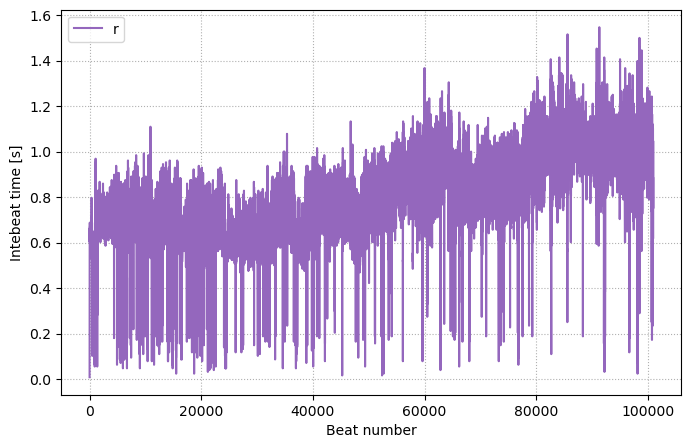

In [9]:
RR = pd.read_hdf('RR_intervals_original.hdf', key=key)
fig = plt.figure(figsize=(8,5))
plt.plot(RR['16265']/128, color=colors[8], label='b(i)')
plt.grid(linestyle='dotted')
plt.xlabel('Beat number')
plt.ylabel('Intebeat time [s]')
plt.legend('right down')
plt.savefig('b_MIT.png', bbox_inches='tight')

## Loading the data inside a Dataframe for easier manipulation

In [1]:
RR_intervals_original=pd.read_hdf('RR_intervals_original.hdf', key=key)

NameError: name 'pd' is not defined

# Clensing the dataframe from the Nan columns

In [ ]:
RR_intervals, files = clean_df(RR_intervals_original, path)

## We clean the data redefining the ones that exede the interval (mean - f x std, mean+f x std)

In [ ]:
factor=3

for file in files:
    mean = RR_intervals[file].mean()
    std  = RR_intervals[file].std()

    RR_intervals[file][(RR_intervals[file] > mean + factor*std) | ( RR_intervals[file]< mean - factor*std)]=mean


# Constructing the cumulative functions from the beats intervals

In [ ]:
B=pd.DataFrame(np.cumsum(RR_intervals, axis=0))

# Constructing the cumulative functions from the beats intervals

## Defining the values for s and computing the increments

In [ ]:
S=[2**i for i in range(3, 11)]
list_Delta_B= increments(B, S, polydegree=3 )

# Computation of  $\Delta_s B(i)$
Function to compute the detrended data and then the increments from the comulative function. In order to do that the B(m) comulative is pass to the function as input. The detranding on different scales s is done with the `detrend.polynomial` function which is imported from the obspy library (see Appendix). 

In [ ]:
def increments(B_df, s_list, polydegree=3):
    '''
    Inputs:
        B: Dataframe with the columns to be detrended
        s_list: List of value of s to be used to detrend B
        polydegree: Polynomial's degree used to detred the data
    
    Output:
        return : List of array containing the detrended data increments for each column of B
    
    '''
    fnames = list(B_df.columns) #columns name list
    list_DB=[]
    
    for s in s_list:
        
        Delta_B_s=[] #empy list to store the increamets for a specific s regardless of the file from which the data come from

        
        for B in B_df[fnames].values.T:
            
            B = B[~np.isnan(B)] #removing all nan values from B     
            nmax_seg=int(np.floor(B.size/(2*s))) #maximum number of possible segments with increment s over B
            
            
            if nmax_seg!= 0: #avoid useless computing power
                
                for indx in range(nmax_seg):
                    detrend.polynomial(B[indx*2*s: (indx+1)*2*s], order=polydegree, plot=False) # for each sliding segment, detrend

                # the whole B but now detrended
                #detrended=B[0:2*s*nmax_seg].copy() #only those that are possible to detrend (have at least the 2s space/segment)
                detrended=B[0:2*s*nmax_seg]
                Delta_s_B_file=np.array([detrended[i+s]-detrended[i] for i in range(2*s*nmax_seg) if i+s< len(detrended)])
                Delta_B_s.append(Delta_s_B_file/np.std(Delta_s_B_file)) #since the std of very patient i svery different from each other we need to normalize the increments and join them togheter
        list_DB.append(np.concatenate(Delta_B_s))
    
    return list_DB


# Fitting distributions

Following the steps of the paper we fit the Gaussian's and Castaing's model to our datasets

## Gaussian models
The gaussian model fit well the peak of the distribution of the $\Delta_s B(i)$, while it fails to fit the tails. This is expected from the theory. 

<table><tr>
    <td><figure><img src="images/Gaussian_fit_Fantasia.png" alt="fantasia" style="width:100%">
<figcaption>Fig.9 - Gaussian fit for Fantasia dataset </figcaption>
</figure></td>
    <table><tr>
    <td><figure><img src="images/Gaussian_fit_MIT.png" alt="fantasia" style="width:100%">
<figcaption>Fig.10 - Gaussian fit for MIT dataset </figcaption>
</figure></td>
        <table><tr>
    <td><figure><img src="images/Gaussian_fit_Chfdb.png" alt="fantasia" style="width:100%">
<figcaption>Fig.11 - Gaussian fit for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

## Castaing's model
Non gaussian model, explanation of the formula, where it comes from, the physical meaning of the parameters, how the fit was implemented on the data, how good the fit is, residuals graph
Explain normalisations choices used, in log scale a division is just a vertical offset 

<table><tr>
    <td><figure><img src="images/Castaing_fit_Fantasia.png" alt="fantasia" style="width:100%">
<figcaption>Fig.12 - Castaing fit for Fantasia dataset </figcaption>
</figure></td>
    <table><tr>
    <td><figure><img src="images/Castaing_fit_MIT.png" alt="fantasia" style="width:100%">
<figcaption>Fig.13 - Castaing fit for MIT dataset </figcaption>
</figure></td>
        <table><tr>
    <td><figure><img src="images/Castaing_fit_Chfdb.png" alt="fantasia" style="width:100%">
<figcaption>Fig.14 - Castaing fit for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

## Unhealthy individuals
Does the fit looks like the previous, how does it change, does it change significantly

# Scale invariance
## Collapse plot on the histogram distributions
Show the collapse plot of the data, use other papers cited in literature, fluctuations at different scales

<table><tr>
    <td><figure><img src="images/Collapse_plot_Fantasia.png" alt="fantasia" style="width:100%">
<figcaption>Fig.12 - Collapse_plot for Fantasia dataset </figcaption>
</figure></td>
    <table><tr>
    <td><figure><img src="images/Collapse_plot_MIT.png" alt="fantasia" style="width:100%">
<figcaption>Fig.13 - Collapse plot for MIT dataset </figcaption>
</figure></td>
        <table><tr>
    <td><figure><img src="images/Collapse_plot_Chfdb.png" alt="fantasia" style="width:100%">
<figcaption>Fig.14 - Collapse plot for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

# Dependence on s parameter for Fantasia Dataset
What do we expect, plot how it changes when s is varied, change detrending order and see if there are any variations

## Calculation and Plot of the fitting parameter $\lambda^2$ as function of s for different polynomial degree used in the detrending procedure## 

### Parameters for S and degree of the testing polynomial degrees

###  Calculation of the fitting parameter Lambda for differnt scale s and polynomial degree of fitting

### Loading the data 

In [2]:
#read data from the files
filename1='lambda_fit.txt'
filename2='lambda_fit_error.txt'

lambda_list=np.loadtxt(filename1)
err_lambda_list=np.loadtxt(filename2)

NameError: name 'np' is not defined


## Plot of $\lambda^2$ as function of s for different polynomial degrees

In [1]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
lambda_square=lambda_list**2 #calculation of lambda^2
err_lambda_square=(2*err_lambda_list/lambda_square)**2 #propagation of the error on lambda^2
mean_lambda_squared =np.mean(lambda_square)

for i in range(0,len(poly_degrees)):
    #print(S)
    #print(lambda_square[i,:])
    ax.errorbar(S_dens, lambda_square[i,:], err_lambda_square[i,:], label='Degree {}'.format(poly_degrees[i]), capsize=1, color=colors[i])

#Plot
""" fig, ax = plt.subplots(1,1)
ax.axhline(y=np.mean(lambda_square), linestyle='dashed', color='grey', label = r'$<\lambda^2$>' )
ax.legend(bbox_to_anchor=(1.02, 0.60), loc='upper left', borderaxespad=0)
ax.grid(linestyle='dotted')
ax.set_xscale('log', subs=[])
ax.set_xlabel('s')
ax.set_ylabel('$\lambda^2$') """

ax.axhline(y=mean_lambda_squared, linestyle='dashed', color='grey', label = fr'$<\lambda^2$>={mean_lambda_squared:.2f}' )
ax.legend(bbox_to_anchor=(1.02, 0.60), loc='upper left', borderaxespad=0)
ax.grid(linestyle='dotted')
ax.set_xscale('log', subs=[])
ax.set_xlabel('s')
ax.set_ylabel('$\lambda^2$')
ax.tick_params(axis='x', which='minor', bottom=False,top=False, labelbottom=False)
ax.xaxis.set_ticks(S_dens)
ax.set_xticklabels(labels=S_dens)
ax.set_xticks(S_dens)
plt.savefig(f'lambda_square.png', bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

<table><tr>
    <td><figure><img src="images/lambda_square.png" alt="fantasia" style="width:100%">
<figcaption>Fig.12 - $\lambda^2$ as function of s for different polynomial degrees </figcaption>
</figure></td>
</tr></table>

# Multifractality nature of the Interbeat Heart Times


# Bibliography